In [2]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

In [3]:
#solution to find available styles from matplotklib as the "seaborn-whitegrid" was not working
from matplotlib import style
print(style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [4]:
#read data
df = pd.read_csv("/workspaces/ZHAW-Data-Science-Fundamentals/Week5/cases/Pharmasales/salesdaily.csv", delimiter=",", names=["DATUM", "M01AB", "M01AE","N02BA","N02BE", "N05B", "N05C", "R03", "RO6", "YEAR", "MONTH", "HOUR","WEEKDAY NAME"], skiprows=1)
df.head(5)


,DATUM,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,RO6,YEAR,MONTH,HOUR,WEEKDAY NAME
0,1/2/2014,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,1/3/2014,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,1/4/2014,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,1/5/2014,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,1/6/2014,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATUM         2106 non-null   object 
 1   M01AB         2106 non-null   float64
 2   M01AE         2106 non-null   float64
 3   N02BA         2106 non-null   float64
 4   N02BE         2106 non-null   float64
 5   N05B          2106 non-null   float64
 6   N05C          2106 non-null   float64
 7   R03           2106 non-null   float64
 8   RO6           2106 non-null   float64
 9   YEAR          2106 non-null   int64  
 10  MONTH         2106 non-null   int64  
 11  HOUR          2106 non-null   int64  
 12  WEEKDAY NAME  2106 non-null   object 
dtypes: float64(8), int64(3), object(2)
memory usage: 214.0+ KB


In [6]:
df.describe()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,RO6,YEAR,MONTH,HOUR
count,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000
mean,5.033683,3.895830,3.880441,29.917095,8.853627,0.593522,5.512262,2.900198,2016.401235,6.344255,275.945869
std,2.737579,2.133337,2.384010,15.590966,5.605605,1.092988,6.428736,2.415816,1.665060,3.386954,1.970547
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,190.000000
25%,3.000000,2.340000,2.000000,19.000000,5.000000,0.000000,1.000000,1.000000,2015.000000,3.000000,276.000000
50%,4.990000,3.670000,3.500000,26.900000,8.000000,0.000000,4.000000,2.000000,2016.000000,6.000000,276.000000
75%,6.670000,5.138000,5.200000,38.300000,12.000000,1.000000,8.000000,4.000000,2018.000000,9.000000,276.000000
max,17.340000,14.463000,16.000000,161.000000,54.833333,9.000000,45.000000,15.000000,2019.000000,12.000000,276.000000


In [7]:
#change "DATUM" to date format
#df["DATUM"] = df["DATUM"].astype("datetime64[ns]")
df["DATUM"] = pd.to_datetime(df["DATUM"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATUM         2106 non-null   datetime64[ns]
 1   M01AB         2106 non-null   float64       
 2   M01AE         2106 non-null   float64       
 3   N02BA         2106 non-null   float64       
 4   N02BE         2106 non-null   float64       
 5   N05B          2106 non-null   float64       
 6   N05C          2106 non-null   float64       
 7   R03           2106 non-null   float64       
 8   RO6           2106 non-null   float64       
 9   YEAR          2106 non-null   int64         
 10  MONTH         2106 non-null   int64         
 11  HOUR          2106 non-null   int64         
 12  WEEKDAY NAME  2106 non-null   object        
dtypes: datetime64[ns](1), float64(8), int64(3), object(1)
memory usage: 214.0+ KB


In [8]:
df.isnull().sum()

DATUM           0
M01AB           0
M01AE           0
N02BA           0
N02BE           0
N05B            0
N05C            0
R03             0
RO6             0
YEAR            0
MONTH           0
HOUR            0
WEEKDAY NAME    0
dtype: int64

In [9]:
df.duplicated().sum()

0

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,RO6
0,0.00,3.670,3.40,32.40,7.0,0.0,0.0,2.00
1,8.00,4.000,4.40,50.60,16.0,0.0,20.0,4.00
2,2.00,1.000,6.50,61.85,10.0,0.0,9.0,1.00
3,4.00,3.000,7.00,41.10,8.0,0.0,3.0,0.00
4,5.00,1.000,4.50,21.70,16.0,2.0,6.0,2.00
...,...,...,...,...,...,...,...,...
2101,7.34,5.683,2.25,22.45,13.0,0.0,1.0,1.00
2102,3.84,5.010,6.00,25.40,7.0,0.0,0.0,0.33
2103,4.00,11.690,2.00,34.60,6.0,0.0,5.0,4.20
2104,7.34,4.507,3.00,50.80,6.0,0.0,10.0,1.00


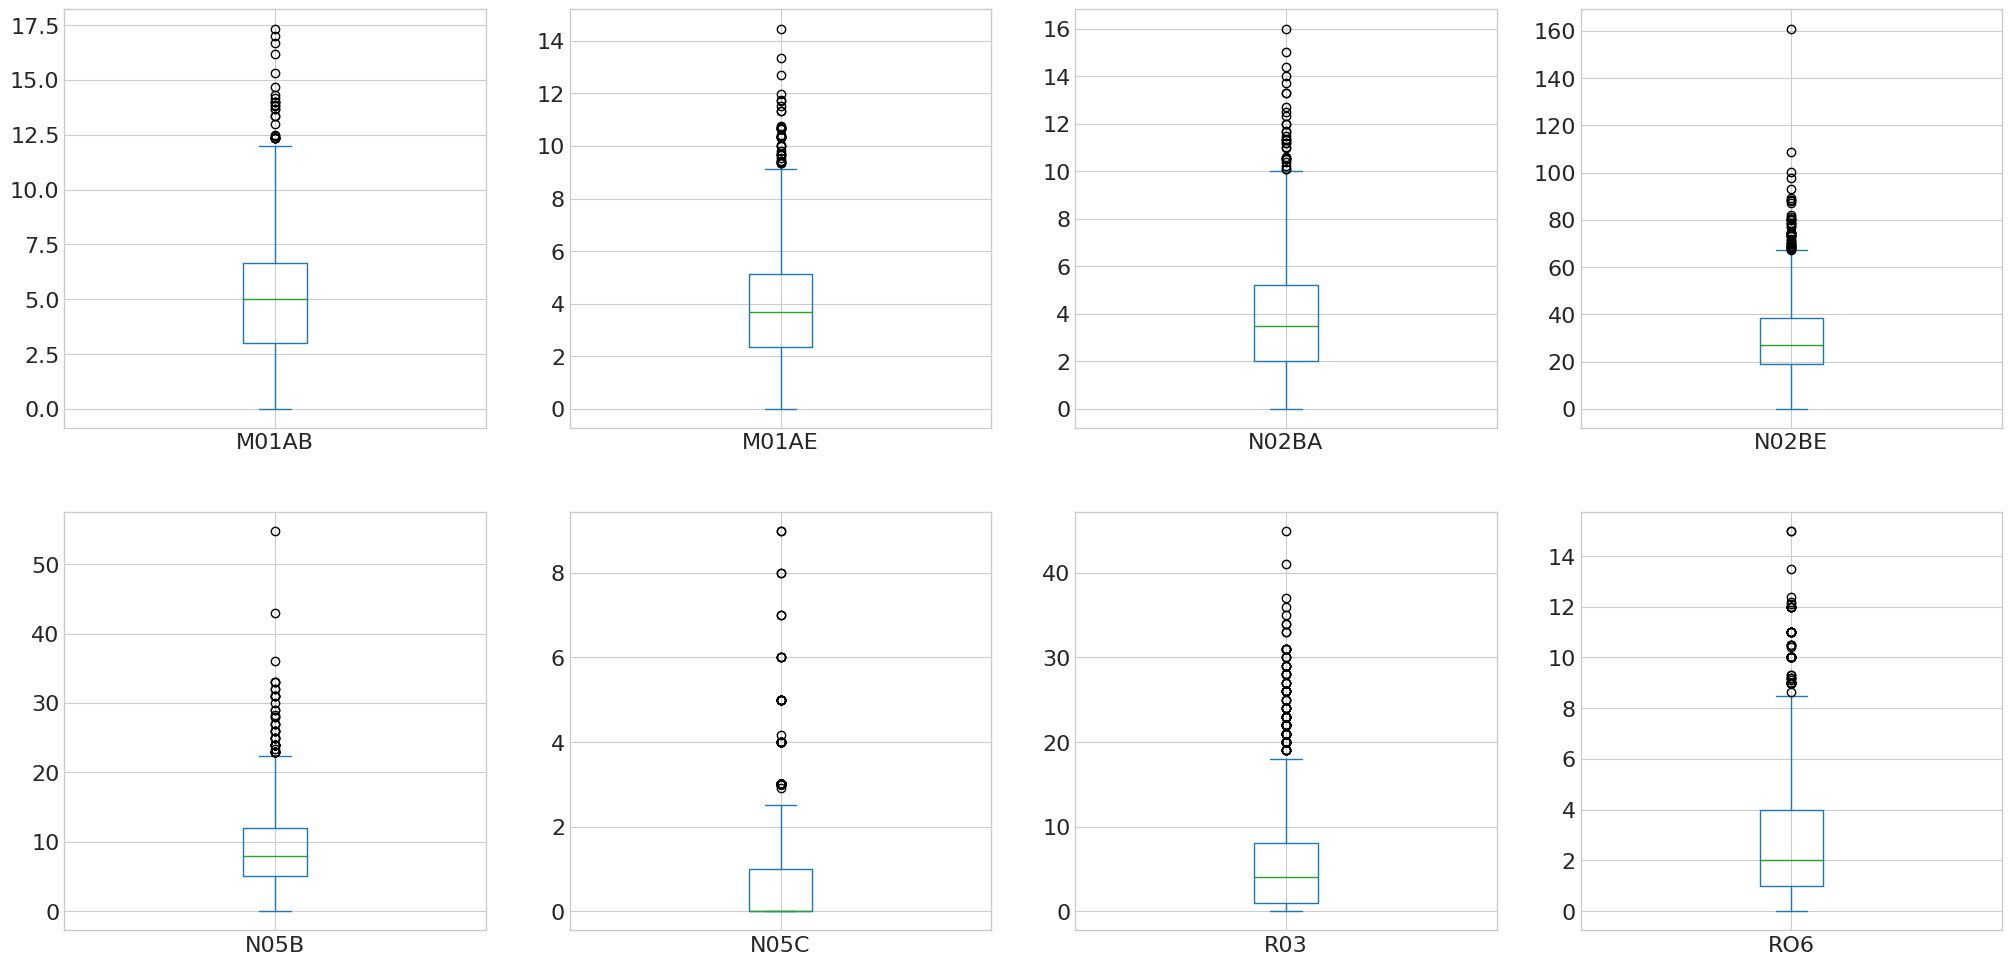

In [54]:
#df_continuous shows the continous variables or in other words the sales per drug category. Sales are daily
df_continuous = df[["M01AB","M01AE","N02BA","N02BE","N05B","N05C","R03","RO6"]]
df_continuous.plot(kind="box", subplots=True, layout=(4,4), fontsize=16, figsize=(25,25))
df_continuous

In [55]:
df_continuous.quantile([0.05,0.25,0.5,0.75,0.95])


,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,RO6
0.05,1.00,0.81625,0.6,10.2000,2.0,0.0,0.0,0.0
0.25,3.00,2.34000,2.0,19.0000,5.0,0.0,1.0,1.0
0.50,4.99,3.67000,3.5,26.9000,8.0,0.0,4.0,2.0
0.75,6.67,5.13800,5.2,38.3000,12.0,1.0,8.0,4.0
0.95,10.00,7.66000,8.0,59.9375,19.0,3.0,20.0,8.0


In [56]:
df_continuous.describe()


,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,RO6
count,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000
mean,5.033683,3.895830,3.880441,29.917095,8.853627,0.593522,5.512262,2.900198
std,2.737579,2.133337,2.384010,15.590966,5.605605,1.092988,6.428736,2.415816
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.340000,2.000000,19.000000,5.000000,0.000000,1.000000,1.000000
50%,4.990000,3.670000,3.500000,26.900000,8.000000,0.000000,4.000000,2.000000
75%,6.670000,5.138000,5.200000,38.300000,12.000000,1.000000,8.000000,4.000000
max,17.340000,14.463000,16.000000,161.000000,54.833333,9.000000,45.000000,15.000000


/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


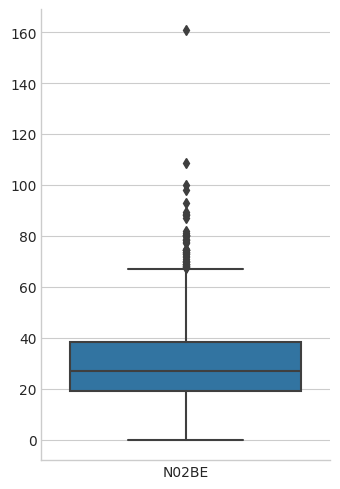

In [57]:
df_new = df[["N02BE"]]
sns.catplot(kind="box", data=df_new, height=5, aspect=0.7, )


In [58]:
#check how many days had 0 Sales per category
count_zeroSales = (df_continous == 0).sum()
count_zeroSales


M01AB      40
M01AE      36
N02BA      78
N02BE      26
N05B       43
N05C     1430
R03       484
RO6       256
dtype: int64

In [59]:
# Caluclating the whiskers:
def iqr_fences(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lowerFence = Q1 - (1.5 * IQR)
    upperFence = Q3 + (1.5 * IQR)
    return lowerFence, upperFence

In [62]:
for label, content in df_continuous.items():
        Q1 = content.quantile(0.25)
        Q3 = content.quantile(0.75)
        IQR = Q3 - Q1
        v_col = content[(content <= Q1 - 1.5 * IQR) | (content >= Q3 + 1.5 * IQR)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Spalte {} Anteil an Outliers = {}%".format(label, round(perc, 2)))

Spalte M01AB Anteil an Outliers = 1.23%
Spalte M01AE Anteil an Outliers = 1.9%
Spalte N02BA Anteil an Outliers = 2.14%
Spalte N02BE Anteil an Outliers = 2.28%
Spalte N05B Anteil an Outliers = 2.28%
Spalte N05C Anteil an Outliers = 7.69%
Spalte R03 Anteil an Outliers = 5.89%
Spalte RO6 Anteil an Outliers = 3.94%


<generator object DataFrame.items at 0x7f0b5d27e020>
